## DS 7337: Natural Language Processing

## Jaclyn Coate
## Homework 6

#### Spring 2021
#### Natural Language Processing w/ Python: Bird, Klein, & Loper

##### HW 6: Question 1
Evaluate text similarity of Amazon book search results by doing the following:
    
    a. Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results.

#### Book Search Results

* Eat Better, Feel Better: My Recipes for Wellness and Healing, Inside and Out
* It's Not Easy Being a Bunny (Beginner Books(R))
* Dog Man: Mothering Heights: From the Creator of Captain Underpants (Dog Man #10) (10)
* This Is the Fire: What I Say to My Friends About Racism
* Little Blue Truck's Springtime
* The Code Breaker: Jennifer Doudna, Gene Editing, and the Future of the Human Race
* Life After Death: A Novel
* Biscuit's Pet & Play Easter: A Touch & Feel Book
* If Animals Kissed Good Night
* Win
* I Love You to the Moon and Back
* The Four Winds: A Novel
* Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones
* The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)
* The Midnight Library: A Novel
* The Boy, the Mole, the Fox and the Horse
* Candlekeep Mysteries (D&D Adventure Book - Dungeons & Dragons) (Dungeons and Dragons)
* The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma
* The Very Hungry Caterpillar
* My First Learn to Write Workbook: Practice for Kids with Pen Control, Line Tracing, Letters, and More!
* Beyond Order: 12 More Rules for Life
* Uncomfortable Conversations with a Black Man
* Everything Will Be Okay: Life Lessons for Young Women (from a Former Young Woman)
* Hippity, Hoppity, Little Bunny (Finger Puppet Board Book for Easter Basket Stuffer Ages 0-4) (Finger Puppet Book)

In [32]:
#Amazon Book List
df =  ['Eat Better, Feel Better: My Recipes for Wellness and Healing, Inside and Out',
'Its Not Easy Being a Bunny (Beginner Books(R))',
'Dog Man: Mothering Heights: From the Creator of Captain Underpants (Dog Man #10) (10)',
'This Is the Fire: What I Say to My Friends About Racism',
'Little Blue Trucks Springtime',
'The Code Breaker: Jennifer Doudna, Gene Editing, and the Future of the Human Race',
'Life After Death: A Novel',
'Biscuits Pet & Play Easter: A Touch & Feel Book',
'If Animals Kissed Good Night',
'Win',
'I Love You to the Moon and Back',
'The Four Winds: A Novel',
'Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones',
'The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)',
'The Midnight Library: A Novel',
'The Boy, the Mole, the Fox and the Horse',
'Candlekeep Mysteries (D&D Adventure Book - Dungeons & Dragons) (Dungeons and Dragons)',
'The Body Keeps the Score: Brain, Mind, and Body in the Healing of Trauma',
'The Very Hungry Caterpillar',
'My First Learn to Write Workbook: Practice for Kids with Pen Control, Line Tracing, Letters, and More!',
'Beyond Order: 12 More Rules for Life',
'Uncomfortable Conversations with a Black Man',
'Everything Will Be Okay: Life Lessons for Young Women (from a Former Young Woman)',
'Hippity, Hoppity, Little Bunny (Finger Puppet Board Book for Easter Basket Stuffer Ages 0-4) (Finger Puppet Book)']

In [33]:
print("Number of Books:",len(df))
print("Book Titles: ", df)

Number of Books: 24
Book Titles:  ['Eat Better, Feel Better: My Recipes for Wellness and Healing, Inside and Out', 'Its Not Easy Being a Bunny (Beginner Books(R))', 'Dog Man: Mothering Heights: From the Creator of Captain Underpants (Dog Man #10) (10)', 'This Is the Fire: What I Say to My Friends About Racism', 'Little Blue Trucks Springtime', 'The Code Breaker: Jennifer Doudna, Gene Editing, and the Future of the Human Race', 'Life After Death: A Novel', 'Biscuits Pet & Play Easter: A Touch & Feel Book', 'If Animals Kissed Good Night', 'Win', 'I Love You to the Moon and Back', 'The Four Winds: A Novel', 'Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones', 'The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)', 'The Midnight Library: A Novel', 'The Boy, the Mole, the Fox and the Horse', 'Candlekeep Mysteries (D&D Adventure Book - Dungeons & Dragons) (Dungeons and Dragons)', 'The Body Keeps the Score: Brain, Mind, and Body in the Heal

    b. In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one.

In [34]:
#https://stackoverflow.com/questions/12118720/python-tf-idf-cosine-to-find-document-similarity
#code assist from: https://github.com/wnayden/MSDS-7337/blob/master/20201103%20MSDS%207337%20HW%206.ipynb

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA
from nltk.tokenize import word_tokenize
import string

In [36]:
#set stopwords as a variable
sw = stopwords.words('english')

In [37]:
#code assist from: https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a
#code assist from: https://github.com/wnayden/MSDS-7337/blob/master/20201103%20MSDS%207337%20HW%206.ipynb

# Clean Title Function
def clean_titles(x):
    tmp = ''.join([i for i in x if i not in string.punctuation])
    tmp = tmp.lower()
    tmp = ' '.join(i for i in tmp.split() if i not in sw)
    return tmp

In [38]:
title_list_clean = list(map(clean_titles,df))

# Checking that our list is cleaned (all lower and no punctuation)
title_list_clean

['eat better feel better recipes wellness healing inside',
 'easy bunny beginner booksr',
 'dog man mothering heights creator captain underpants dog man 10 10',
 'fire say friends racism',
 'little blue trucks springtime',
 'code breaker jennifer doudna gene editing future human race',
 'life death novel',
 'biscuits pet play easter touch feel book',
 'animals kissed good night',
 'win',
 'love moon back',
 'four winds novel',
 'atomic habits easy proven way build good habits break bad ones',
 'four agreements practical guide personal freedom toltec wisdom book',
 'midnight library novel',
 'boy mole fox horse',
 'candlekeep mysteries dd adventure book dungeons dragons dungeons dragons',
 'body keeps score brain mind body healing trauma',
 'hungry caterpillar',
 'first learn write workbook practice kids pen control line tracing letters',
 'beyond order 12 rules life',
 'uncomfortable conversations black man',
 'everything okay life lessons young women former young woman',
 'hippity hop

In [39]:
# Importing Cosine Similarity Tools
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
# Creating a matrix of work appearances
vec = CountVectorizer().fit_transform(title_list_clean)
vecs = vec.toarray()

In [41]:
vecs.shape

(24, 124)

In [42]:
# Cosine Similarity of Titles
cos_similarity = cosine_similarity(vecs)

# Taking a quick look at the first two titles
cos_similarity[:2,:]

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.11952286, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.1       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13867505, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10660036]])

In [43]:
# Function to compare pairwise
cos_similarity.shape

(24, 24)

    c. Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?
    
Using our heatmap below we can see that barely any of our books are similar. Not a single really stand out as having any similarity at all. However, we can say that 6 & 11 and 6 & 14 have some similarity that is near .3-.4 correlation.

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

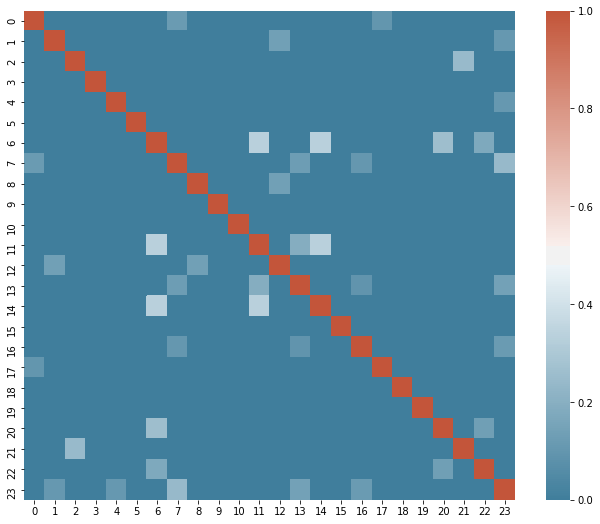

In [47]:
#code assist from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
#code assist from: https://github.com/wnayden/MSDS-7337/blob/master/20201103%20MSDS%207337%20HW%206.ipynb

f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cos_similarity, cmap=cmap)

Below we see the relationship between 6 & 11

In [50]:
print("Score: ", cos_similarity[6,11])
print("\nTitle 9:\n", df[6],"\n","Title 22: \n",df[11])

Score:  0.3333333333333334

Title 9:
 Life After Death: A Novel 
 Title 22: 
 The Four Winds: A Novel


Below we see the relationship between 6 & 14

In [51]:
print("Score: ", cos_similarity[6,14])
print("\nTitle 9:\n", df[6],"\n","Title 22: \n",df[14])

Score:  0.3333333333333334

Title 9:
 Life After Death: A Novel 
 Title 22: 
 The Midnight Library: A Novel


##### HW 6: Question 2
Now evaluate using a major search engine.
    
    a. Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results. 

In [67]:
# Title used for Google search
Title = "women lean in"

# 1st organic reslt
first = """Lean In: Women, Work, and the Will to Lead"""
# 7th organic result
seventh = "Hop on Pop"

In [68]:
capsules = [Title, first, seventh]

#code assist from: https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a
#code assist from : https://github.com/wnayden/MSDS-7337/blob/master/20201103%20MSDS%207337%20HW%206.ipynb

#function to clean the capsules up
def clean_string(x):
    tmp = ''.join([i for i in x if i not in string.punctuation])
    tmp = tmp.lower()
    tmp = ' '.join(i for i in tmp.split() if i not in sw)
    return tmp

capsules_clean = list(map(clean_string,capsules))

In [69]:
capsules_clean

['women lean', 'lean women work lead', 'hop pop']

    b. Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title). 

When you complete a results and compare the first to a later in the list we would expect to see a much lower cosine similarity score. It is not surprising that the further you get away from the top search results we start to see things differ. This is actually in line with Google's search algorithms. As you move farther away from the most related Google starts to list things that are tangentally related using different lexical analysis such as elevating the synonmyms and hyponomns. Overall, what we see it what we expected. 

In [70]:
# Creating the matrix of word appearances
c_vec = CountVectorizer().fit_transform(capsules_clean)
cap_vecs = c_vec.toarray()

In [71]:
#Code assist from: https://towardsdatascience.com/calculating-string-similarity-in-python-276e18a7d33a
#Code assist from: https://github.com/wnayden/MSDS-7337/blob/master/20201103%20MSDS%207337%20HW%206.ipynb

# Funciton Comparing the Two Results to the Title
def capsule_cossim_vecs(x, y):
    x = x.reshape(1,-1)
    y = y.reshape(1,-1)
    return cosine_similarity(x,y)[0][0]

    c. Which one has the highest similarity measure?

In [72]:
# Title versus 1st capsule
capsule_cossim_vecs(cap_vecs[0],cap_vecs[1])

0.7071067811865475

In [75]:
# Title versus 7th capsule
capsule_cossim_vecs(cap_vecs[0],cap_vecs[2])

0.0